In [1]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
%pip install pydub

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
import librosa
import os

def total_duration(folder_path):

    total_duration = 0

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.wav'):
            print(file_name)
            file_path = os.path.join(folder_path, file_name)

            audio_data, sample_rate = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio_data, sr=sample_rate)

            total_duration += duration

    return total_duration

In [4]:
folder_path = "C:\Programming\LanguageIdentification\English"
total = total_duration(folder_path)
print("Total duration of audio files:", total, "seconds")

education_0001.wav
education_0002.wav
education_0003.wav
traffic_0000.wav
Total duration of audio files: 4169.5144375 seconds


In [5]:
folder_path = "C:\Programming\LanguageIdentification\Hindi"
total = total_duration(folder_path)
print("Total duration of audio files:", total, "seconds")

train_hindimale_00649.wav
train_hindimale_00650.wav
train_hindimale_00651.wav
train_hindimale_00652.wav
train_hindimale_00653.wav
train_hindimale_00654.wav
train_hindimale_00655.wav
train_hindimale_00656.wav
train_hindimale_00657.wav
train_hindimale_00658.wav
train_hindimale_00659.wav
train_hindimale_00660.wav
train_hindimale_00661.wav
train_hindimale_00662.wav
train_hindimale_00663.wav
train_hindimale_00664.wav
train_hindimale_00665.wav
train_hindimale_00666.wav
train_hindimale_00667.wav
train_hindimale_00668.wav
train_hindimale_00669.wav
train_hindimale_00670.wav
train_hindimale_00671.wav
train_hindimale_00672.wav
train_hindimale_00673.wav
train_hindimale_00674.wav
train_hindimale_00675.wav
train_hindimale_00676.wav
train_hindimale_00677.wav
train_hindimale_00678.wav
train_hindimale_00679.wav
train_hindimale_00680.wav
train_hindimale_00681.wav
train_hindimale_00682.wav
train_hindimale_00683.wav
train_hindimale_00684.wav
train_hindimale_00685.wav
train_hindimale_00686.wav
train_hindim

In [6]:
folder_path = "C:\Programming\LanguageIdentification\CodeMixed"
total = total_duration(folder_path)
print("Total duration of audio files:", total, "seconds")

0a8GyoWn0KRgXxTx.wav
0jdhCdy6wPFMjRXl.wav
0RDwoEVIUAhVPibN.wav
0RmUBH81UE6b1jFc.wav
0V7yPA2pAqrJrW7Y.wav
0ypaM0qtYiXXTroM.wav
0ZCBRzDx7vigtAuy.wav
Total duration of audio files: 3916.5499999999997 seconds


In [7]:
from pydub import AudioSegment
from pydub.silence import split_on_silence

count = {"English":0,"Hindi":0,"CodeMixed":0}

def split_audio_on_silence(input_file, output_folder,folder_name, silence_thresh=-30, min_silence_len=2000, keep_silence=100):
    # Load audio file
    audio = AudioSegment.from_file(input_file, format="wav")

    # Split audio based on silence
    segments = split_on_silence(
        audio,
        min_silence_len=min_silence_len,
        silence_thresh=silence_thresh,
        keep_silence=keep_silence
    )

    segment_durations = [len(segment) / 1000.0 for segment in segments]

    # Export segments and print their lengths
    for i, segment in enumerate(segments):
        
        # Calculate and print segment duration in seconds
        segment_duration = segment_durations[i]  # Convert milliseconds to seconds
        count[folder_name] += 1
        print(f"Label: {folder_name} File: {input_file} Segment {i}: Duration = {segment_duration:.2f} seconds")

    return segments, segment_durations

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [8]:
import os
import glob

def process_folder(folder_path, folder_name):
    # Create a folder to store the segmented audio files
    output_folder = os.path.join(".", 'segmented')
    os.makedirs(output_folder, exist_ok=True)

    # Get a list of all .wav files in the folder
    audio_files = glob.glob(os.path.join(folder_path, '*.wav'))

    # Loop through each audio file
    for idx, audio_file in enumerate(audio_files):
        audio = AudioSegment.from_wav(audio_file)
        total_duration = audio.duration_seconds  # Get the duration of the original file

        segments, segment_durations = split_audio_on_silence(audio_file, output_folder, folder_name, silence_thresh=-30, min_silence_len=2000, keep_silence=100,)

        cumulative_start_time = 0  # Keep track of the cumulative start time
        cumulative_end_time = 0  # Keep track of the cumulative end time

        for segment_idx, (segment, segment_duration) in enumerate(zip(segments, segment_durations)):
            segment_name = f"{folder_name}_{idx}_{segment_idx}.wav"
            segment_path = os.path.join(output_folder, segment_name)
            segment.export(segment_path, format="wav")

            # Calculate cumulative start and end times
            start_time = cumulative_start_time
            end_time = cumulative_end_time + segment_duration

            # Store start and end times in a text file
            time_info_file = os.path.splitext(segment_path)[0] + '.txt'
            with open(time_info_file, 'w') as f:
                f.write(f"Start time: {start_time} seconds\nEnd time: {end_time} seconds\n(Out of {total_duration} seconds)")

            cumulative_start_time = end_time
            cumulative_end_time = end_time

In [9]:
import shutil

# Specify the directory to remove
directory_path = 'C:\Programming\LanguageIdentification\segmented'
shutil.rmtree(directory_path)

folder_paths = [
    os.path.join(".", "CodeMixed"),
    os.path.join(".", "English"),
    os.path.join(".", "Hindi")
]

folder_names = ["CodeMixed","English","Hindi"]

for folder_path, folder_name in zip(folder_paths, folder_names):
    process_folder(folder_path, folder_name)

Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 0: Duration = 13.78 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 1: Duration = 10.98 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 2: Duration = 24.69 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 3: Duration = 13.85 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 4: Duration = 35.90 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 5: Duration = 4.55 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 6: Duration = 29.03 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 7: Duration = 4.43 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 8: Duration = 5.67 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 9: Duration = 22.59 seconds
Label: CodeMixed File: .\CodeMixed\0a8GyoWn0KRgXxTx.wav Segment 10: Duration = 47.5

In [10]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


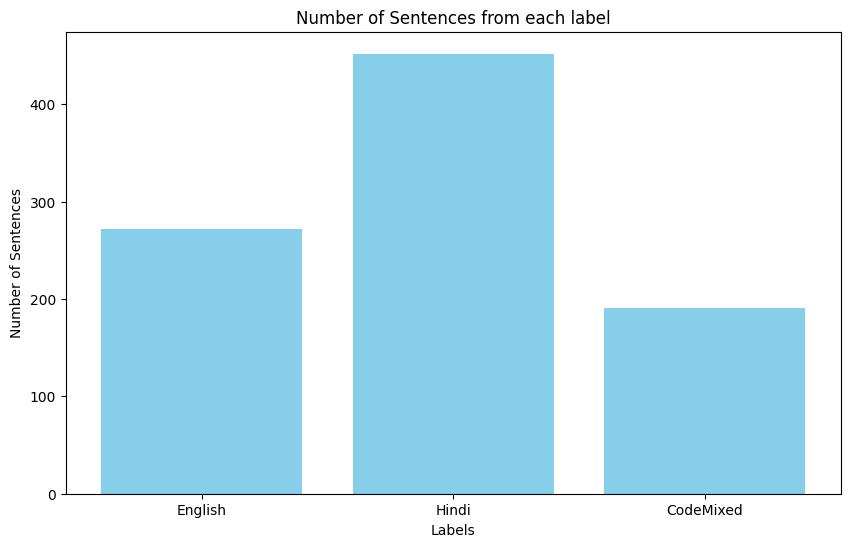

In [11]:
import matplotlib.pyplot as plt

labels = list(count.keys())
counts = list(count.values())

plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color='skyblue')
plt.xlabel("Labels")
plt.ylabel("Number of Sentences")
plt.title("Number of Sentences from each label")
plt.show()

In [12]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [13]:
import librosa
import pandas as pd

def process_segmented_files(segmented_folder_path):
    data = []

    segmented_files = glob.glob(os.path.join(segmented_folder_path, '*.wav'))

    for segmented_file in segmented_files:

        print(segmented_file)
        print("\n\n")

        y, sample_rate = librosa.core.load(segmented_file, sr=None, mono=True)
        segments = librosa.effects.split(y, top_db=20)
        segment_count = len(segments)
        segment_list = []
        
        for i, (start, end) in enumerate(segments):
            segment = y[start:end]
            segment_list.append(segment)
            
            # Calculate and print segment duration in seconds
            segment_duration = (end - start) / sample_rate
            print(f"Segment {i}: Duration = {segment_duration:.2f} seconds")
                    

        # Extract the label from the file name
        file_name = os.path.basename(segmented_file)
        label = file_name.split('_')[0]

        # Append the features and label to the data list
        data.append({'segment_list': segment_list, 'label': label,'sample_rate':sample_rate})

    # Create a DataFrame from the data list
    df = pd.DataFrame(data)

    return df

dataset = process_segmented_files("C:\Programming\LanguageIdentification\segmented")

C:\Programming\LanguageIdentification\segmented\CodeMixed_0_0.wav



Segment 0: Duration = 1.38 seconds
Segment 1: Duration = 1.15 seconds
Segment 2: Duration = 0.77 seconds
Segment 3: Duration = 0.26 seconds
Segment 4: Duration = 1.18 seconds
Segment 5: Duration = 0.58 seconds
Segment 6: Duration = 0.22 seconds
Segment 7: Duration = 1.28 seconds
Segment 8: Duration = 0.70 seconds
Segment 9: Duration = 0.70 seconds
Segment 10: Duration = 0.26 seconds
Segment 11: Duration = 0.77 seconds
Segment 12: Duration = 1.17 seconds
C:\Programming\LanguageIdentification\segmented\CodeMixed_0_1.wav



Segment 0: Duration = 2.02 seconds
Segment 1: Duration = 0.64 seconds
Segment 2: Duration = 0.80 seconds
Segment 3: Duration = 0.80 seconds
Segment 4: Duration = 0.70 seconds
Segment 5: Duration = 0.22 seconds
Segment 6: Duration = 1.06 seconds
Segment 7: Duration = 0.22 seconds
Segment 8: Duration = 0.38 seconds
Segment 9: Duration = 0.90 seconds
Segment 10: Duration = 1.09 seconds
Segment 11: Durati

In [14]:
dataset.head()

,segment_list,label,sample_rate
0,"[[-0.10708618, -0.071014404, -0.08306885, -0.0...",CodeMixed,16000
1,"[[0.0016479492, 0.001739502, 0.0016174316, 0.0...",CodeMixed,16000
2,"[[0.002380371, 0.0025634766, 0.0025939941, 0.0...",CodeMixed,16000
3,"[[-0.007904053, -0.0082092285, -0.007293701, -...",CodeMixed,16000
4,"[[0.004852295, 0.0023498535, -3.0517578e-05, 0...",CodeMixed,16000


In [15]:
print(dataset['segment_list'][0])

[array([-0.10708618, -0.0710144 , -0.08306885, ..., -0.0078125 ,
       -0.00427246, -0.0098877 ], dtype=float32), array([ 0.1307373 ,  0.14105225, -0.01507568, ..., -0.00198364,
       -0.00094604, -0.00289917], dtype=float32), array([ 0.00234985,  0.00177002,  0.00180054, ..., -0.00823975,
       -0.01000977, -0.0098877 ], dtype=float32), array([ 0.00289917,  0.003479  ,  0.00299072, ...,  0.04116821,
       -0.0489502 ,  0.078125  ], dtype=float32), array([-0.00317383,  0.00152588, -0.00512695, ..., -0.00817871,
       -0.00900269, -0.00976562], dtype=float32), array([0.00906372, 0.00741577, 0.00772095, ..., 0.00411987, 0.03277588,
       0.01635742], dtype=float32), array([ 0.0118103 , -0.05474854, -0.01876831, ...,  0.00854492,
        0.00894165,  0.0027771 ], dtype=float32), array([-0.0020752 , -0.00125122, -0.00094604, ..., -0.00613403,
       -0.00732422, -0.00772095], dtype=float32), array([-0.00244141, -0.0017395 ,  0.00015259, ..., -0.02468872,
       -0.0123291 , -0.008178

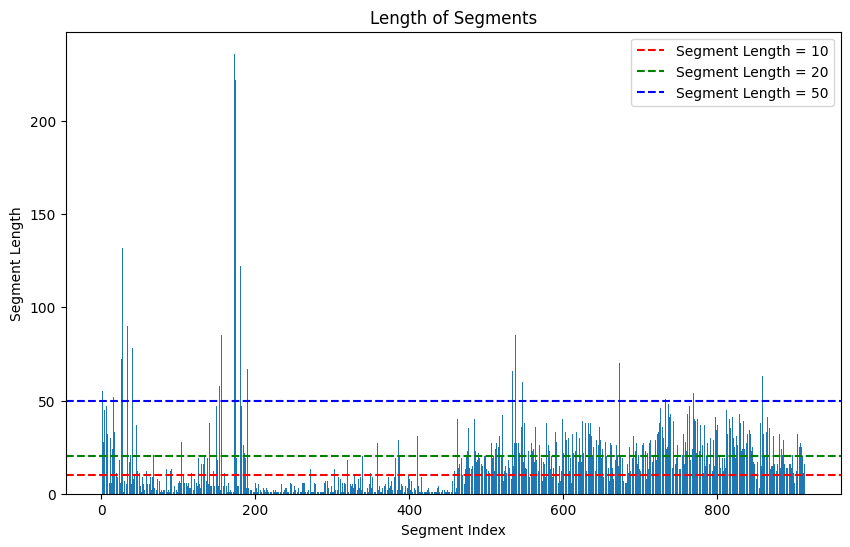

In [16]:
import matplotlib.pyplot as plt

segment_lengths = [len(segment) for segment in dataset["segment_list"]]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(segment_lengths)), segment_lengths)
plt.xlabel("Segment Index")
plt.ylabel("Segment Length")
plt.title("Length of Segments")

plt.axhline(y=10, color='r', linestyle='--', label='Segment Length = 10')
plt.axhline(y=20, color='g', linestyle='--', label='Segment Length = 20')
plt.axhline(y=50, color='b', linestyle='--', label='Segment Length = 50')

# Show legend
plt.legend()
plt.show()

In [17]:
filtered_segments = []

for segment in dataset["segment_list"]:
    if len(segment) > 20:
        filtered_segments.append(segment[:20])
    else:
        filtered_segments.append(segment)

dataset['filtered_segment'] = filtered_segments

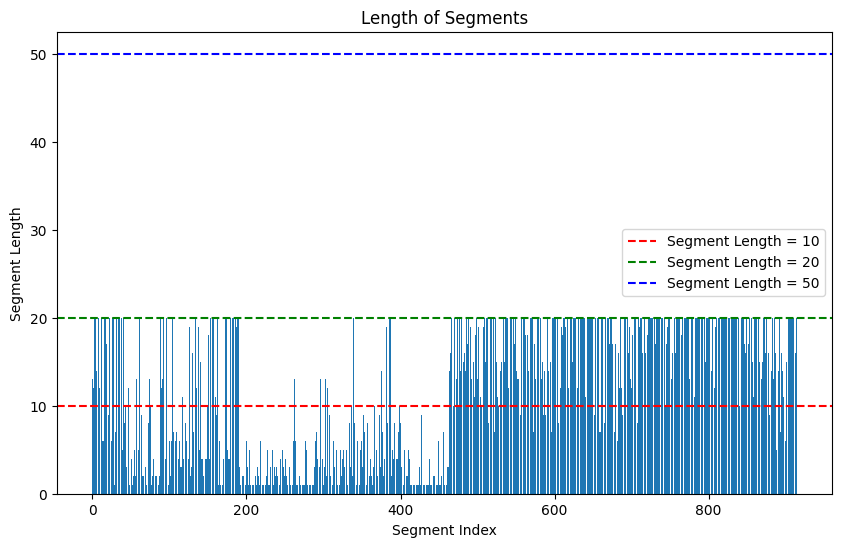

In [18]:
segment_lengths = [len(segment) for segment in dataset["filtered_segment"]]

# Plot a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(len(segment_lengths)), segment_lengths)
plt.xlabel("Segment Index")
plt.ylabel("Segment Length")
plt.title("Length of Segments")

plt.axhline(y=10, color='r', linestyle='--', label='Segment Length = 10')
plt.axhline(y=20, color='g', linestyle='--', label='Segment Length = 20')
plt.axhline(y=50, color='b', linestyle='--', label='Segment Length = 50')

# Show legend
plt.legend()
plt.show()

In [19]:
total_syllables = 0

for segment in dataset['filtered_segment']:
    total_syllables += len(segment)

print(total_syllables)

10731


In [20]:
%pip install transformers

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [21]:
from transformers import Wav2Vec2FeatureExtractor

feature_extractor = Wav2Vec2FeatureExtractor(
    feature_size=1,
    sampling_rate=16000,
    padding_value=0.0,
    do_normalize=True,
    return_attention_mask=False
)

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
%pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124

Looking in indexes: https://download.pytorch.org/whl/cu124
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [23]:
from transformers import Wav2Vec2Model

model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h")

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\aksha\.cache\huggingface\hub\models--facebook--wav2vec2-base-960h. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of Wav2Vec2Model were not initialized from the model checkpoint at faceboo

In [24]:
audio_data = dataset["filtered_segment"][0][0]
print(audio_data)

[-0.10708618 -0.0710144  -0.08306885 ... -0.0078125  -0.00427246
 -0.0098877 ]


In [25]:
import torch

with torch.no_grad():
    inputs = feature_extractor(audio_data, return_tensors="pt", sampling_rate=16000)
    outputs = model(**inputs)

print(outputs.extract_features)

tensor([[[ 0.0270, -0.1747, -0.0313,  ..., -0.4696, -0.3159,  0.0116],
         [ 0.0240,  0.0716,  0.0621,  ...,  0.1277, -0.2140, -0.2020],
         [-0.0903,  0.1580,  0.2567,  ..., -0.0046, -0.4218, -0.3130],
         ...,
         [-0.3033,  0.0810,  0.0788,  ...,  0.5255, -0.4093, -0.5644],
         [-0.3307,  0.0831,  0.1562,  ...,  0.8460, -0.5521, -0.6058],
         [-0.2005, -0.0879,  0.3167,  ...,  0.8128, -0.3414, -0.5215]]])


In [26]:
extract_features = outputs.extract_features
avg_pooled_features = torch.mean(extract_features, dim=-1)
print(avg_pooled_features)
print(avg_pooled_features[0])

tensor([[0.0229, 0.0191, 0.0193, 0.0200, 0.0202, 0.0202, 0.0205, 0.0235, 0.0232,
         0.0221, 0.0238, 0.0261, 0.0266, 0.0256, 0.0262, 0.0259, 0.0264, 0.0266,
         0.0269, 0.0257, 0.0304, 0.0270, 0.0253, 0.0241, 0.0240, 0.0262, 0.0269,
         0.0276, 0.0267, 0.0268, 0.0243, 0.0284, 0.0273, 0.0289, 0.0294, 0.0328,
         0.0296, 0.0243, 0.0238, 0.0248, 0.0222, 0.0251, 0.0274, 0.0282, 0.0279,
         0.0265, 0.0286, 0.0265, 0.0283, 0.0286, 0.0248, 0.0241, 0.0238, 0.0239,
         0.0242, 0.0231, 0.0255, 0.0264, 0.0257, 0.0264, 0.0269, 0.0239, 0.0214,
         0.0224, 0.0245, 0.0246, 0.0261, 0.0262]])
tensor([0.0229, 0.0191, 0.0193, 0.0200, 0.0202, 0.0202, 0.0205, 0.0235, 0.0232,
        0.0221, 0.0238, 0.0261, 0.0266, 0.0256, 0.0262, 0.0259, 0.0264, 0.0266,
        0.0269, 0.0257, 0.0304, 0.0270, 0.0253, 0.0241, 0.0240, 0.0262, 0.0269,
        0.0276, 0.0267, 0.0268, 0.0243, 0.0284, 0.0273, 0.0289, 0.0294, 0.0328,
        0.0296, 0.0243, 0.0238, 0.0248, 0.0222, 0.0251, 0.0274

In [27]:
all_extracted_features = []
count = 0

with torch.no_grad():
    for index, row in dataset.iterrows():

        segment_list = row['filtered_segment']
        
        item_features = []


        for segment in segment_list:

            print(count)
            count+= 1

            inputs = feature_extractor(segment, return_tensors="pt", sampling_rate=16000)
            outputs = model(**inputs)
            
            features = outputs.extract_features
            
            avg_pooled_features = torch.mean(features, dim=-1)
            item_features.append(avg_pooled_features)
        
        all_extracted_features.append(item_features)

dataset['extracted_features'] = all_extracted_features

print(dataset)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [28]:
dataset.to_pickle("dataset.pkl")

In [29]:
import pandas as pd

dataset_pk = pd.read_pickle("dataset.pkl")

print(dataset_pk['extracted_features'][0])


[tensor([[0.0229, 0.0191, 0.0193, 0.0200, 0.0202, 0.0202, 0.0205, 0.0235, 0.0232,
         0.0221, 0.0238, 0.0261, 0.0266, 0.0256, 0.0262, 0.0259, 0.0264, 0.0266,
         0.0269, 0.0257, 0.0304, 0.0270, 0.0253, 0.0241, 0.0240, 0.0262, 0.0269,
         0.0276, 0.0267, 0.0268, 0.0243, 0.0284, 0.0273, 0.0289, 0.0294, 0.0328,
         0.0296, 0.0243, 0.0238, 0.0248, 0.0222, 0.0251, 0.0274, 0.0282, 0.0279,
         0.0265, 0.0286, 0.0265, 0.0283, 0.0286, 0.0248, 0.0241, 0.0238, 0.0239,
         0.0242, 0.0231, 0.0255, 0.0264, 0.0257, 0.0264, 0.0269, 0.0239, 0.0214,
         0.0224, 0.0245, 0.0246, 0.0261, 0.0262]]), tensor([[0.0236, 0.0248, 0.0262, 0.0242, 0.0240, 0.0245, 0.0251, 0.0236, 0.0232,
         0.0247, 0.0266, 0.0251, 0.0243, 0.0230, 0.0226, 0.0247, 0.0261, 0.0269,
         0.0253, 0.0241, 0.0248, 0.0257, 0.0264, 0.0296, 0.0293, 0.0283, 0.0282,
         0.0316, 0.0300, 0.0295, 0.0293, 0.0313, 0.0294, 0.0306, 0.0288, 0.0257,
         0.0296, 0.0278, 0.0285, 0.0306, 0.0266, 0.0230,

In [30]:
proper_tensor_dataset = []

for tensor_list in dataset_pk['extracted_features'].to_list():
    proper_tensor_list = []
    for tensor in tensor_list:
        proper_tensor_list.append(tensor[0].numpy())
    proper_tensor_dataset.append(proper_tensor_list)


print(proper_tensor_dataset[0])

dataset_pk['proper_features'] = proper_tensor_dataset


[array([0.02289165, 0.01911352, 0.01930189, 0.02004749, 0.02022851,
       0.02016986, 0.0204504 , 0.02346012, 0.02317534, 0.02205707,
       0.02380231, 0.02605518, 0.02659998, 0.02555015, 0.02618781,
       0.02593895, 0.02640838, 0.0265715 , 0.02692561, 0.02572683,
       0.03037273, 0.02698351, 0.02527016, 0.02411992, 0.02399579,
       0.02616671, 0.02687692, 0.02761145, 0.02665861, 0.02675529,
       0.02430361, 0.02839989, 0.02734023, 0.02890585, 0.02941971,
       0.0327786 , 0.02962367, 0.02425782, 0.0238444 , 0.02482209,
       0.02219171, 0.02506247, 0.02735027, 0.02817213, 0.02788679,
       0.02646913, 0.02860355, 0.02651562, 0.02829499, 0.02862526,
       0.02476366, 0.02406405, 0.02382774, 0.02392122, 0.02419129,
       0.02306944, 0.02545669, 0.02636226, 0.0256766 , 0.02639163,
       0.0269377 , 0.02392592, 0.02143324, 0.02242057, 0.02448263,
       0.02460968, 0.02610739, 0.02621413], dtype=float32), array([0.02363094, 0.02483058, 0.02622186, 0.02415899, 0.02401453,
 

In [31]:
def should_remove(item):

    for tensor in item:
        if len(tensor) > 1000:
            return True
    
    return False


filtered_dataset = dataset_pk[~dataset_pk["proper_features"].apply(should_remove)]

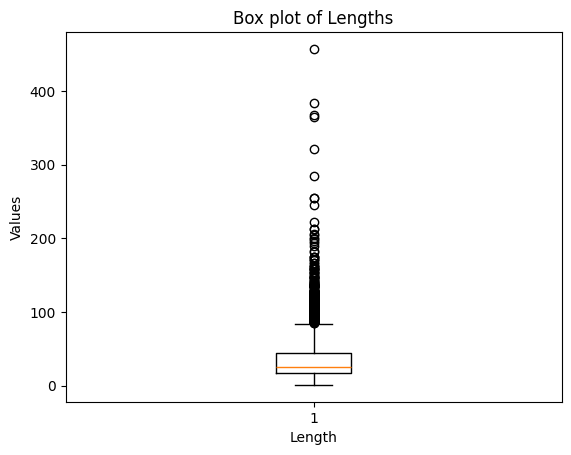

In [32]:
import matplotlib.pyplot as plt

len_array = []

for tensor_list in filtered_dataset['proper_features']:
    for tensor in tensor_list:
        len_array.append(len(tensor))

plt.boxplot(len_array)
plt.xlabel('Length')
plt.ylabel('Values')
plt.title('Box plot of Lengths')
plt.show()

In [33]:
def should_remove(item):

    for tensor in item:
        if len(tensor) > 100:
            return True
    
    return False


filtered_dataset = dataset_pk[~dataset_pk["proper_features"].apply(should_remove)]

In [34]:
print(len(dataset_pk))
print(len(filtered_dataset))

915
715


In [35]:
import numpy as np

max_tensor_length = 100
max_len = 20

padded_tensor_dataset = []

for tensor_list in filtered_dataset['proper_features']:
    padded_tensor_list = []
    for tensor in tensor_list:
        current_length = tensor.shape[0]
        padded_tensor = np.zeros((max_tensor_length,),dtype=tensor.dtype)
        padded_tensor[:current_length] = tensor
        padded_tensor_list.append(padded_tensor)

    if len(padded_tensor_list) < max_len:
        tensor = padded_tensor_list[0]
        for i in range(max_len - len(padded_tensor_list)):
            padded_tensor = np.zeros((max_tensor_length,) + tensor.shape[1:],dtype=tensor.dtype)
            padded_tensor_list.append(padded_tensor)
    
    padded_tensor_dataset.append(np.array(padded_tensor_list))

print(padded_tensor_dataset)
        

[array([[0.02289165, 0.01911352, 0.01930189, ..., 0.        , 0.        ,
        0.        ],
       [0.02363094, 0.02483058, 0.02622186, ..., 0.        , 0.        ,
        0.        ],
       [0.02623774, 0.02826893, 0.0268546 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32), array([[0.02575739, 0.026691  , 0.02693656, ..., 0.02506062, 0.0262913 ,
        0.02287521],
       [0.02553139, 0.02736842, 0.02809623, ..., 0.        , 0.        ,
        0.        ],
       [0.0288124 , 0.02754117, 0.02710087, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        

In [36]:
for tensor_list in padded_tensor_dataset:
    print(len(tensor_list))

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
2

In [37]:
for tensor_list in padded_tensor_dataset:
    for tensor in tensor_list:
        print(len(tensor))

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [38]:
filtered_dataset['padded_features'] = padded_tensor_dataset

C:\Users\aksha\AppData\Local\Temp\ipykernel_59376\278673644.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['padded_features'] = padded_tensor_dataset


In [39]:
label_map = {'English': 0, 'Hindi': 1, 'CodeMixed': 2}
filtered_dataset['label_numeric'] = filtered_dataset['label'].map(label_map)

C:\Users\aksha\AppData\Local\Temp\ipykernel_59376\655317510.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['label_numeric'] = filtered_dataset['label'].map(label_map)


In [40]:
from sklearn.model_selection import train_test_split

dataset_random = filtered_dataset.sample(frac=1,random_state=42)

train_df,test_df = train_test_split(dataset_random,test_size=0.2,train_size=0.8)

train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

print("Train set size:", len(train_df))
print("Test set size:", len(test_df))

Train set size: 572
Test set size: 143


In [41]:
train_df

,segment_list,label,sample_rate,filtered_segment,extracted_features,proper_features,padded_features,label_numeric
0,"[[0.0004272461, 0.00036621094, 0.0004272461, 0...",Hindi,48000,"[[0.0004272461, 0.00036621094, 0.0004272461, 0...","[[[tensor(0.0259), tensor(0.0248), tensor(0.02...","[[0.025900751, 0.024824612, 0.025779955, 0.024...","[[0.025900751, 0.024824612, 0.025779955, 0.024...",1
1,"[[0.01083374, 0.007751465, 0.0028686523, 0.000...",English,16000,"[[0.01083374, 0.007751465, 0.0028686523, 0.000...","[[[tensor(0.0246), tensor(0.0248), tensor(0.02...","[[0.024629835, 0.02484573, 0.025418816, 0.0233...","[[0.024629835, 0.02484573, 0.025418816, 0.0233...",0
2,"[[0.0022888184, 0.0025024414, 0.0026550293, 0....",CodeMixed,16000,"[[0.0022888184, 0.0025024414, 0.0026550293, 0....","[[[tensor(0.0258), tensor(0.0251), tensor(0.02...","[[0.025781943, 0.025052957, 0.026478399, 0.025...","[[0.025781943, 0.025052957, 0.026478399, 0.025...",2
3,"[[-6.1035156e-05, 0.0, -3.0517578e-05, -0.0001...",Hindi,48000,"[[-6.1035156e-05, 0.0, -3.0517578e-05, -0.0001...","[[[tensor(0.0296), tensor(0.0258), tensor(0.02...","[[0.029630875, 0.025840633, 0.027072936, 0.027...","[[0.029630875, 0.025840633, 0.027072936, 0.027...",1
4,"[[0.021362305, 0.012390137, 0.018310547, 0.013...",English,16000,"[[0.021362305, 0.012390137, 0.018310547, 0.013...","[[[tensor(0.0248), tensor(0.0230), tensor(0.02...","[[0.024797652, 0.02299544, 0.022325408, 0.0215...","[[0.024797652, 0.02299544, 0.022325408, 0.0215...",0
...,...,...,...,...,...,...,...,...
567,"[[0.0056762695, 0.008422852, 0.001159668, 0.01...",English,16000,"[[0.0056762695, 0.008422852, 0.001159668, 0.01...","[[[tensor(0.0277), tensor(0.0280), tensor(0.02...","[[0.027749518, 0.027982635, 0.02617141, 0.0255...","[[0.027749518, 0.027982635, 0.02617141, 0.0255...",0
568,"[[-0.09371948, -0.08605957, -0.09536743, -0.11...",English,16000,"[[-0.09371948, -0.08605957, -0.09536743, -0.11...","[[[tensor(0.0249), tensor(0.0224), tensor(0.01...","[[0.024932113, 0.022438802, 0.019362897, 0.020...","[[0.024932113, 0.022438802, 0.019362897, 0.020...",0
569,"[[0.048034668, 0.030151367, -0.0036010742, -0....",Hindi,48000,"[[0.048034668, 0.030151367, -0.0036010742, -0....","[[[tensor(0.0232), tensor(0.0257), tensor(0.02...","[[0.023238307, 0.02571807, 0.02604444, 0.02432...","[[0.023238307, 0.02571807, 0.02604444, 0.02432...",1
570,"[[0.02798462, 0.0007019043, -0.03515625, 0.071...",English,16000,"[[0.02798462, 0.0007019043, -0.03515625, 0.071...","[[[tensor(0.0230), tensor(0.0261), tensor(0.02...","[[0.0229588, 0.026063003, 0.025226131, 0.02535...","[[0.0229588, 0.026063003, 0.025226131, 0.02535...",0


In [42]:
train_df['padded_features'][0]

array([[0.02590075, 0.02482461, 0.02577996, ..., 0.        , 0.        ,
        0.        ],
       [0.02335715, 0.02517726, 0.02468337, ..., 0.        , 0.        ,
        0.        ],
       [0.02620768, 0.02486805, 0.02799238, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

In [43]:
train_df['padded_features'][0][0]

array([0.02590075, 0.02482461, 0.02577996, 0.02435209, 0.02679536,
       0.02846869, 0.02748052, 0.02859961, 0.0261403 , 0.0250216 ,
       0.02732547, 0.02846847, 0.02935102, 0.02760817, 0.02962248,
       0.02838453, 0.02860008, 0.0274918 , 0.02632736, 0.02682997,
       0.02692105, 0.02533717, 0.02652506, 0.02353424, 0.02719625,
       0.02636734, 0.02664519, 0.02587763, 0.02954243, 0.03028286,
       0.02663621, 0.02681004, 0.02629276, 0.03183628, 0.02878397,
       0.03009228, 0.02963127, 0.03010906, 0.02824832, 0.02977544,
       0.02857331, 0.02870254, 0.02946771, 0.02475956, 0.02553924,
       0.02511317, 0.02816802, 0.02664309, 0.02427456, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
for sentence in train_df['padded_features']:
    sentence_np = np.array(sentence)
    print(sentence_np.shape)

(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)
(20, 100)


In [45]:
x_train = np.array(train_df['padded_features'].to_list())
print(x_train.shape)
y_train = np.array(train_df['label_numeric'].to_list())
print(y_train.shape)

num_classes = len(np.unique(y_train))
print(num_classes)

(572, 20, 100)
(572,)
3


In [47]:
%pip install tensorflow

     -------------------------------------- 390.0/390.0 MB 1.8 MB/s eta 0:00:00
     -------------------------------------- 431.6/431.6 KB 2.1 MB/s eta 0:00:00
     ---------------------------------------- 5.5/5.5 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 KB ? eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 126.7/126.7 KB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 4.4/4.4 MB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 71.9/71.9 KB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 26.4/26.4 MB 2.3 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 133.7/133.7 KB 1.6 MB/s eta 0:00:00
  Using cached wheel-0.44.0-py3-none-any.whl (67 kB)
    

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()

model.add(LSTM(units = 128,return_sequences = True,input_shape=(20,100)))
model.add(LSTM(units=256,return_sequences=True))
model.add(LSTM(units=256,return_sequences=True))
model.add(LSTM(units=128))
model.add(Dense(units=num_classes,activation = 'softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics = ['accuracy'])
model.summary()

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 128)        │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 20, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 20, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,234,307 (4.71 MB)

 Trainable params: 1,234,307 (4.71 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)


history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_model.keras")

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7458 - loss: 0.5637
Epoch 1: val_accuracy improved from -inf to 0.76522, saving model to best_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.7463 - loss: 0.5638 - val_accuracy: 0.7652 - val_loss: 0.5546
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8084 - loss: 0.5029
Epoch 2: val_accuracy did not improve from 0.76522
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.8071 - loss: 0.5040 - val_accuracy: 0.7565 - val_loss: 0.6271
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7676 - loss: 0.5430
Epoch 3: val_accuracy did not improve from 0.76522
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.7682 - loss: 0.5411 - val_accuracy: 0.7565 - val_loss: 0.5903
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8270 - loss: 0.4535
Epoch 4: val_accuracy did not improve from 0.76522
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8254 - loss: 0.4555

In [53]:
x_test = np.array(test_df['padded_features'].to_list())
y_test = np.array(test_df['label_numeric'].to_list())

print(x_test.shape)
print(y_test.shape)

(143, 20, 100)
(143,)


In [54]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)
print(predicted_labels)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step
[2 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 2 0 0
 0 1 1 0 1 0 0 1 1 1 1 0 2 1 1 0 0 1 0 1 1 0 2 1 2 0 0 0 0 0 0 1 1 1 1 1 0
 1 1 1 0 1 0 1 0 0 0 2 1 0 1 2 0 1 1 0 1 0 0 2 1 1 0 1 0 1 0 1 1 1 0 1 1 1
 1 1 1 2 1 1 0 1 2 1 1 2 0 0 0 1 1 1 1 2 1 1 1 0 0 1 1 1 1 0 1 0]


In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7412587412587412
Precision: 0.7901441768108435
Recall: 0.7412587412587412
F1 Score: 0.7036925277394486


In [57]:
%pip install seaborn

     -------------------------------------- 294.9/294.9 KB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aksha\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


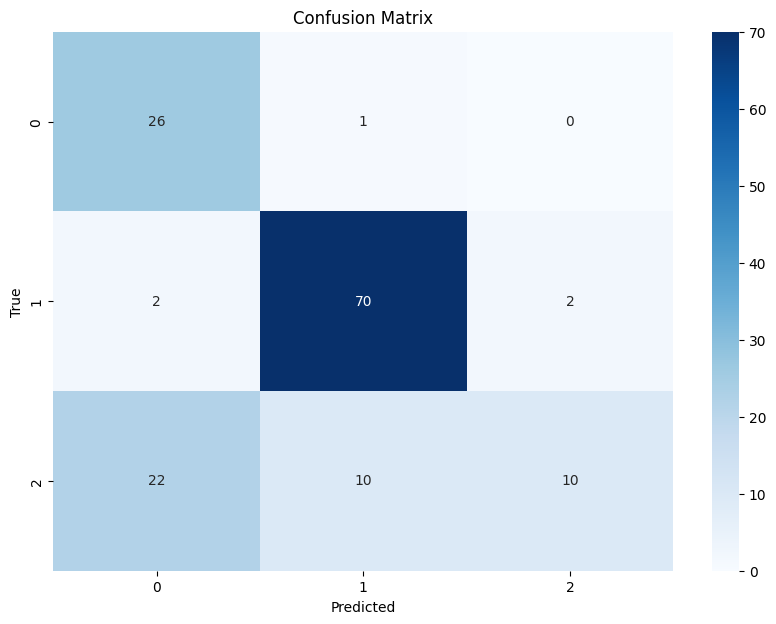

In [58]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [59]:
from tensorflow.keras.layers import GRU

model = Sequential()

model.add(GRU(units=128, return_sequences=True, input_shape=(20, 100)))
model.add(GRU(units=256, return_sequences=True))
model.add(GRU(units=256, return_sequences=True))
model.add(GRU(units=128))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("best_gru_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_gru_model.keras")

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 20, 128)        │        88,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 20, 256)        │       296,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 20, 256)        │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 128)            │       148,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 928,131 (3.54 MB)

 Trainable params: 928,131 (3.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4801 - loss: 0.9989
Epoch 1: val_accuracy improved from -inf to 0.76522, saving model to best_gru_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - accuracy: 0.4862 - loss: 0.9935 - val_accuracy: 0.7652 - val_loss: 0.6531
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6855 - loss: 0.7641
Epoch 2: val_accuracy improved from 0.76522 to 0.77391, saving model to best_gru_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.6864 - loss: 0.7618 - val_accuracy: 0.7739 - val_loss: 0.5855
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6961 - loss: 0.6944
Epoch 3: val_accuracy did not improve from 0.77391
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.6966 - loss: 0.6954 - val_accuracy: 0.7565 - val_loss: 0.6735
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7129 - loss: 0.7201
Epoch 4: val_accuracy did not improve from 0.77391
15/15 ━━━━━━━━━━━━━━━━━━━━ 

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
Accuracy: 0.7132867132867133
Precision: 0.7356643356643356
Recall: 0.7132867132867133
F1 Score: 0.6824929456508403


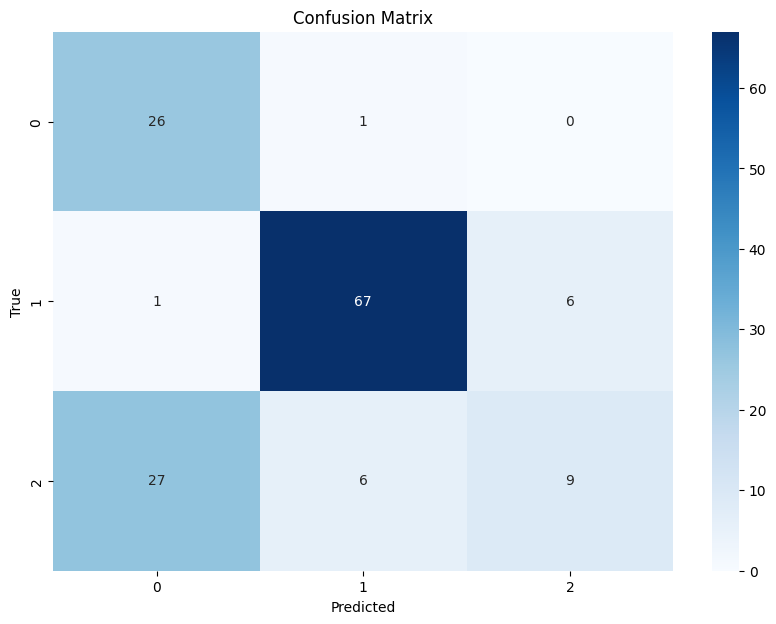

In [60]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [61]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()

model.add(SimpleRNN(units=128, return_sequences=True, input_shape=(20, 100)))
model.add(SimpleRNN(units=256, return_sequences=True))
model.add(SimpleRNN(units=256, return_sequences=True))
model.add(SimpleRNN(units=128))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("best_rnn_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_rnn_model.keras")

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 20, 128)        │        29,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 20, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 20, 256)        │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 308,867 (1.18 MB)

 Trainable params: 308,867 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5318 - loss: 1.2421
Epoch 1: val_accuracy improved from -inf to 0.70435, saving model to best_rnn_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.5549 - loss: 1.1687 - val_accuracy: 0.7043 - val_loss: 0.6814
Epoch 2/50
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7646 - loss: 0.6072
Epoch 2: val_accuracy improved from 0.70435 to 0.73043, saving model to best_rnn_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7532 - loss: 0.6251 - val_accuracy: 0.7304 - val_loss: 0.8088
Epoch 3/50
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7420 - loss: 0.6712
Epoch 3: val_accuracy did not improve from 0.73043
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7296 - loss: 0.6904 - val_accuracy: 0.7130 - val_loss: 0.5923
Epoch 4/50
11/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6932 - loss: 0.7119
Epoch 4: val_accuracy did not improve from 0.73043
15/15 ━━━━━━━━━━━━━━━━━━━━ 

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000020F153EDEE0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Accuracy: 0.7762237762237763
Precision: 0.7968255560795015
Recall: 0.7762237762237763
F1 Score: 0.7478371500268075


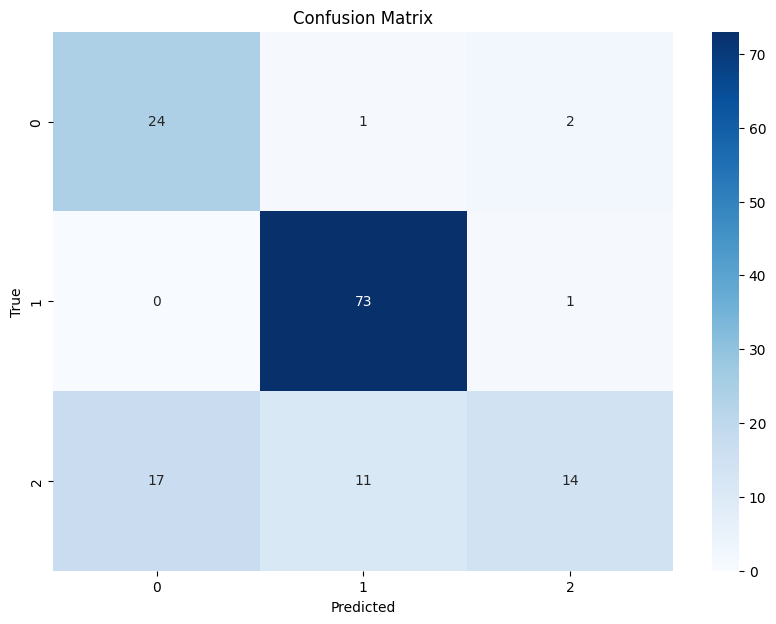

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from tensorflow.keras.layers import Bidirectional

model = Sequential()

model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(20, 100)))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Bidirectional(LSTM(units=256, return_sequences=True)))
model.add(Bidirectional(LSTM(units=128)))
model.add(Dense(units=num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

checkpoint = ModelCheckpoint("best_bilstm_model.keras", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

model.load_weights("best_bilstm_model.keras")

c:\Users\aksha\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 20, 256)        │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 20, 512)        │     1,050,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 20, 512)        │     1,574,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 256)            │       656,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,517,187 (13.42 MB)

 Trainable params: 3,517,187 (13.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5540 - loss: 0.9683
Epoch 1: val_accuracy improved from -inf to 0.76522, saving model to best_bilstm_model.keras
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 132ms/step - accuracy: 0.5652 - loss: 0.9518 - val_accuracy: 0.7652 - val_loss: 0.7742
Epoch 2/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.7251 - loss: 0.7294
Epoch 2: val_accuracy did not improve from 0.76522
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7220 - loss: 0.7312 - val_accuracy: 0.7565 - val_loss: 0.6407
Epoch 3/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6887 - loss: 0.6990
Epoch 3: val_accuracy did not improve from 0.76522
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - accuracy: 0.6904 - loss: 0.6966 - val_accuracy: 0.7304 - val_loss: 0.6350
Epoch 4/50
14/15 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.7035 - loss: 0.6936
Epoch 4: val_accuracy improved from 0.76522 to 0.77391, saving model to best_bilstm_model.keras
15/15 ━━━━━━━━━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step
Accuracy: 0.7272727272727273
Precision: 0.7316554071591187
Recall: 0.7272727272727273
F1 Score: 0.6886890862266604


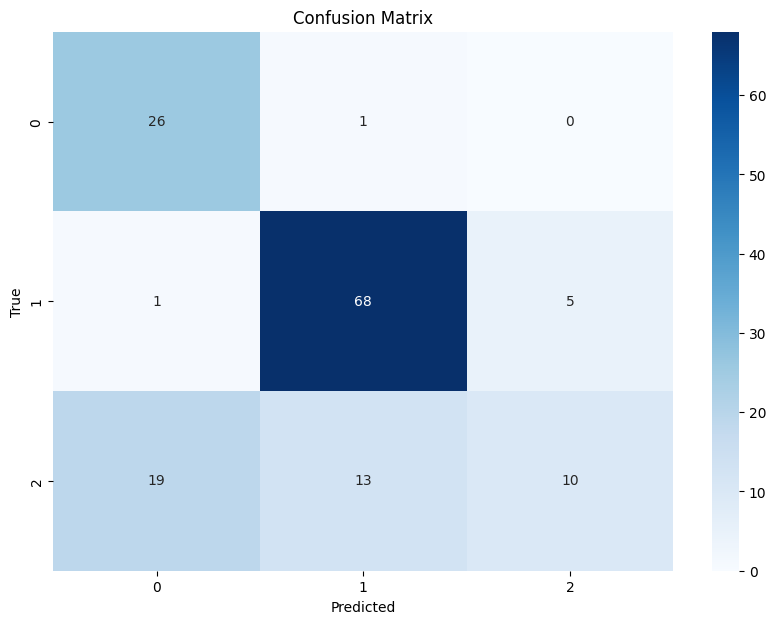

In [ ]:
predictions = model.predict(x_test)
predicted_labels = np.argmax(predictions, axis=1)

accuracy = accuracy_score(y_test, predicted_labels)
precision = precision_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
recall = recall_score(y_test, predicted_labels, average='weighted') # Use 'macro' or 'weighted' for multi-class problems
f1 = f1_score(y_test, predicted_labels, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

cm = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()